In [5]:
import os
import sys

from dotenv import find_dotenv


sys.path.append(os.path.dirname(find_dotenv()))

In [1]:
import cv2
from typing import List
import numpy
def read(path_to_video: str,
         frame_start: int = None,
         frame_end: int = None) -> List[numpy.ndarray]:
    """Reads a video frames from a local path or a URL.

    Args:
        path_to_video: A path or a url to a utils.
        frame_start: Starting frame
        frame_end: End frame.

    Returns: a list of frame images.
    """
    cap = cv2.VideoCapture(path_to_video)
    counter = 0
    list_of_frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        counter += 1
        if frame_start and counter < frame_start:
            continue
        if frame_end and counter >= frame_end:
            break
        if ret:
            list_of_frames.append(frame)
        else:
            break
    cap.release()
    return list_of_frames


In [2]:
import mediapipe as mp

def extract_pose_from_video(list_of_frames):
    mp_pose = mp.solutions.pose
    list_of_pose = []
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose: 
        for image in list_of_frames:
            results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            list_of_pose.append(results)
    return list_of_pose

objc[27564]: Class CaptureDelegate is implemented in both /Users/jacobrafati/zouk/zouk_training_app_ml/mp_env/lib/python3.8/site-packages/cv2/cv2.abi3.so (0x161eda840) and /Users/jacobrafati/zouk/zouk_training_app_ml/mp_env/lib/python3.8/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x127928860). One of the two will be used. Which one is undefined.
objc[27564]: Class CVWindow is implemented in both /Users/jacobrafati/zouk/zouk_training_app_ml/mp_env/lib/python3.8/site-packages/cv2/cv2.abi3.so (0x161eda890) and /Users/jacobrafati/zouk/zouk_training_app_ml/mp_env/lib/python3.8/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x117feca68). One of the two will be used. Which one is undefined.
objc[27564]: Class CVView is implemented in both /Users/jacobrafati/zouk/zouk_training_app_ml/mp_env/lib/python3.8/site-packages/cv2/cv2.abi3.so (0x161eda8b8) and /Users/jacobrafati/zouk/zouk_training_app_ml/mp_env/lib/python3.8/site-packages/mediapipe/.dylibs/libopenc

In [3]:
path_to_video_student = "/Users/jacobrafati/zouk/videos/zouk_basic_steps_student.mov"
list_of_frames_student = read(path_to_video_student)
list_of_pose_student = extract_pose_from_video(list_of_frames_student)

path_to_video_teacher = "/Users/jacobrafati/zouk/videos/zouk_basic_steps_teacher.mov"
list_of_frames_teacher = read(path_to_video_teacher)
list_of_pose_teacher = extract_pose_from_video(list_of_frames_teacher)

path_to_video_Kimberley = "/Users/jacobrafati/zouk/videos/zouk_basic_steps_Kimberley.mov"
list_of_frames_Kimberley = read(path_to_video_Kimberley)
list_of_pose_Kimberley = extract_pose_from_video(list_of_frames_Kimberley)



INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
len(list_of_pose_teacher)

149

In [93]:
def get_3d_for_frame(list_of_pose, frame_number, world_landmark=False, scale_correction=True):
    xs = []
    ys = []
    zs = []
    for i in range(33):
        if world_landmark:
            xs.append(list_of_pose[frame_number].pose_world_landmarks.landmark[i].x)
            ys.append(list_of_pose[frame_number].pose_world_landmarks.landmark[i].y)
            zs.append(list_of_pose[frame_number].pose_world_landmarks.landmark[i].z)
        else:
            xs.append(list_of_pose[frame_number].pose_landmarks.landmark[i].x)
            ys.append(list_of_pose[frame_number].pose_landmarks.landmark[i].y)
            zs.append(list_of_pose[frame_number].pose_landmarks.landmark[i].z)
            
        if scale_correction:
            scale = 
        
    return xs, ys, zs
    

In [94]:
xs, ys, zs = get_3d_for_frame(list_of_pose_student, 10)

In [95]:
list_of_pose_teacher[0].pose_world_landmarks.landmark

[x: 0.012456249
y: 0.63563734
z: -0.3153518
visibility: 0.9903358
, x: -0.0070641525
y: 0.6534529
z: -0.3132875
visibility: 0.98022836
, x: -0.008718472
y: 0.6547538
z: -0.30096126
visibility: 0.9755715
, x: -0.0069002435
y: 0.65436506
z: -0.3048724
visibility: 0.9839702
, x: 0.015089724
y: 0.6675087
z: -0.32531404
visibility: 0.9908674
, x: 0.01447729
y: 0.66515857
z: -0.3367846
visibility: 0.9922707
, x: 0.0116115175
y: 0.65270895
z: -0.3166141
visibility: 0.9954171
, x: -0.0640094
y: 0.6285818
z: -0.21822596
visibility: 0.9864138
, x: 0.07091886
y: 0.5974294
z: -0.2143296
visibility: 0.98764277
, x: -0.021834936
y: 0.62071145
z: -0.26909196
visibility: 0.9903859
, x: 0.015511021
y: 0.5885957
z: -0.29327795
visibility: 0.9931427
, x: -0.15663257
y: 0.45540264
z: -0.10466355
visibility: 0.99949133
, x: 0.14972575
y: 0.52149594
z: -0.038951635
visibility: 0.99949515
, x: -0.23054281
y: 0.28333408
z: -0.07281004
visibility: 0.16418424
, x: 0.2090287
y: 0.22485301
z: -0.09858835
visibili

In [299]:
import numpy
import matplotlib.pyplot as plt
import matplotlib.animation as animation

skeleton = [
    [0,1], [0, 4],[1,2], [4,5],[2,3], [5,6], [3,7], [6,8], [9,10],
    [11,13], [13, 15], [15,21], [17,19], [15,19],
    [12,14],[14,16], [16,22],[16,18],[18,20],[16,20],
    [11,12], [11,23],[12,24],[23,24],
    [23,25], [25,27],[27,29], [29,31],[31,27],
    [24,26], [26,28], [28,30], [30,32],[32,28]
]


def visualize_one_frame_3d(list_of_pose, frame_number, world_landmark=False):
    xs, ys, zs = get_3d_for_frame(list_of_pose, frame_number, world_landmark)
    ax = plt.axes(projection="3d")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.view_init(elev=10., azim=10., roll=90)
    ax.dist = 7
    ax.set_box_aspect([5,5,2])
    ax.plot3D(xs, ys, zs, "o", color="red", linewidth=4.0)

    for points_pair in skeleton:
        i1 = points_pair[0]
        i2 = points_pair[1]
        p1 = [xs[i1], ys[i1], zs[i1]]
        p2 = [xs[i2], ys[i2], zs[i2]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color="blue", linewidth=3.0)
    plt.show()


def update_3d_pose(frame_number, lines, points, list_of_pose, world_landmark):
    
    xs, ys, zs = get_3d_for_frame(list_of_pose, frame_number)
    
    points[0].set_xdata(numpy.array(xs))
    points[0].set_ydata(numpy.array(ys))
    points[0].set_3d_properties(numpy.array(zs), zdir="z")

    for j, points_pair in enumerate(skeleton):
        i1 = points_pair[0]
        i2 = points_pair[1]
        p1 = [xs[i1], ys[i1], zs[i1]]
        p2 = [xs[i2], ys[i2], zs[i2]]
        
        lines[j][0].set_xdata(numpy.array([p1[0], p2[0]]))
        lines[j][0].set_ydata(numpy.array([p1[1], p2[1]]))
        lines[j][0].set_3d_properties(numpy.array([p1[2], p2[2]]), zdir="z")
    return lines, points


def animate(list_of_pose,world_landmark=False, fps=30):
    fig = plt.figure(figsize=(5,5))
    ax = plt.axes(projection="3d")

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.view_init(elev=10., azim=10., roll=90)
    ax.dist = 7
    ax.set_box_aspect([5,5,2])
#     radius = 1
#     ax.set_xlim3d([-radius / 2, radius / 2])
#     ax.set_zlim3d([-radius / 2, radius / 2])
#     ax.set_ylim3d([-radius / 2, radius / 2])

    lines = []

    xs, ys, zs = get_3d_for_frame(list_of_pose, 0,world_landmark)
    points = ax.plot3D(xs, ys, zs, "o", color="red", linewidth=4.0)

    for points_pair in skeleton:
        i1 = points_pair[0]
        i2 = points_pair[1]
        p1 = [xs[i1], ys[i1], zs[i1]]
        p2 = [xs[i2], ys[i2], zs[i2]]
        lines.append(ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], color="blue", linewidth=3.0, zdir="z"))

    anim = animation.FuncAnimation(fig, update_3d_pose, fargs=(lines, points, list_of_pose,world_landmark),
                                   frames=len(list_of_pose), interval=1000 / fps, repeat=True)
    return anim


<IPython.core.display.Javascript object>


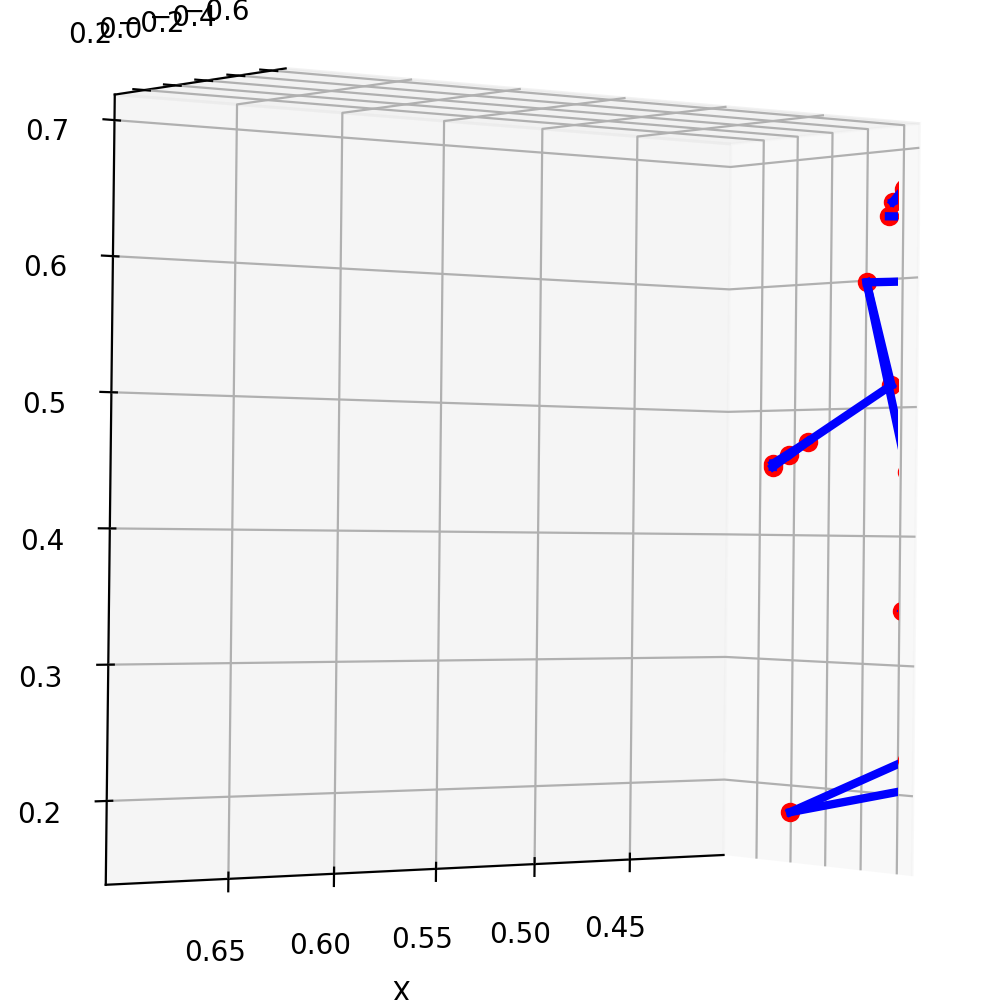

/var/folders/7s/ds2tmwg54q3brtbqdmbxxsxc0000gn/T/ipykernel_30927/3040840259.py:68: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7


In [207]:
%matplotlib notebook

# visualize_one_frame_3d(list_of_pose_teacher, 100)
animate(list_of_pose_student,world_landmark=False, fps=30)

In [164]:
len(list_of_pose_Kimberley)

838

In [130]:
list_of_pose_teacher[-1].pose_landmarks.landmark[0]

x: 0.44642136
y: 0.7166331
z: -0.35874736
visibility: 0.99969876

In [281]:
def write(list_of_frames,
          path_to_video,
          width,
          height,
          fps: int = 30,
          frame_start: int = None,
          frame_end: int = None):
    out = cv2.VideoWriter(path_to_video,
                          cv2.VideoWriter_fourcc('m', 'p', '4', 'v'),
                          fps,
                          (width, height))
    for i, frame in enumerate(list_of_frames):
        if frame_start and i < frame_start:
            continue
        if frame_end and i > frame_end:
            continue
        out.write(frame)
    out.release()


In [326]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
def create_2d_visulaization(list_of_frames, list_of_pose, color=(160,32,240)):
    annotated_image_list = []
    for i, image in enumerate(list_of_frames):
        annotated_image = image.copy()
        image_hight, image_width, _ = image.shape
        results = list_of_pose[i]
        if not results.pose_landmarks:
            continue
        
        thickness = 8
        xs, ys, _ = get_3d_for_frame(list_of_pose, i)
        for line in skeleton:
            p = line[0]
            q = line[1]     
            start_point = tuple([int(xs[p]*image_width), int(ys[p]*image_hight)])
            end_point = tuple([int(xs[q]*image_width), int(ys[q]*image_hight)])
            annotated_image = cv2.line(annotated_image, start_point, end_point, color, thickness)
            
#         annotated_image = cv2.rotate(annotated_image, cv2.ROTATE_180)
        annotated_image_list.append(annotated_image)
    
    
    return annotated_image_list


In [271]:
annotated_image_list = create_2d_visulaization(list_of_frames_student, list_of_pose_student)

In [272]:
image_hight, image_width, _ = list_of_frames_student[0].shape

In [273]:
write(annotated_image_list,
          "/Users/jacobrafati/zouk/videos/zouk_basic_steps_student_results.mp4",
          image_width,
          image_hight)

added frame: 0
added frame: 1
added frame: 2
added frame: 3
added frame: 4
added frame: 5
added frame: 6
added frame: 7
added frame: 8
added frame: 9
added frame: 10
added frame: 11
added frame: 12
added frame: 13
added frame: 14
added frame: 15
added frame: 16
added frame: 17
added frame: 18
added frame: 19
added frame: 20
added frame: 21
added frame: 22
added frame: 23
added frame: 24
added frame: 25
added frame: 26
added frame: 27
added frame: 28
added frame: 29
added frame: 30
added frame: 31
added frame: 32
added frame: 33
added frame: 34
added frame: 35
added frame: 36
added frame: 37
added frame: 38
added frame: 39
added frame: 40
added frame: 41
added frame: 42
added frame: 43
added frame: 44
added frame: 45
added frame: 46
added frame: 47
added frame: 48
added frame: 49
added frame: 50
added frame: 51
added frame: 52
added frame: 53
added frame: 54
added frame: 55
added frame: 56
added frame: 57
added frame: 58
added frame: 59
added frame: 60
added frame: 61
added frame: 62
ad

added frame: 492
added frame: 493
added frame: 494
added frame: 495
added frame: 496
added frame: 497
added frame: 498
added frame: 499
added frame: 500
added frame: 501
added frame: 502
added frame: 503
added frame: 504
added frame: 505
added frame: 506
added frame: 507
added frame: 508
added frame: 509
added frame: 510
added frame: 511
added frame: 512
added frame: 513
added frame: 514
added frame: 515
added frame: 516
added frame: 517
added frame: 518
added frame: 519
added frame: 520
added frame: 521
added frame: 522
added frame: 523
added frame: 524
added frame: 525
added frame: 526
added frame: 527
added frame: 528
added frame: 529
added frame: 530
added frame: 531
added frame: 532
added frame: 533
added frame: 534
added frame: 535
added frame: 536
added frame: 537
added frame: 538
added frame: 539
added frame: 540
added frame: 541
added frame: 542
added frame: 543
added frame: 544
added frame: 545
added frame: 546
added frame: 547
added frame: 548
added frame: 549
added frame: 5

In [276]:
annotated_image_list = create_2d_visulaization(list_of_frames_teacher, list_of_pose_teacher)
image_hight, image_width, _ = list_of_frames_teacher[0].shape
write(annotated_image_list,
          "/Users/jacobrafati/zouk/videos/zouk_basic_steps_teacher_results.mp4",
          image_width,
          image_hight)

added frame: 0
added frame: 1
added frame: 2
added frame: 3
added frame: 4
added frame: 5
added frame: 6
added frame: 7
added frame: 8
added frame: 9
added frame: 10
added frame: 11
added frame: 12
added frame: 13
added frame: 14
added frame: 15
added frame: 16
added frame: 17
added frame: 18
added frame: 19
added frame: 20
added frame: 21
added frame: 22
added frame: 23
added frame: 24
added frame: 25
added frame: 26
added frame: 27
added frame: 28
added frame: 29
added frame: 30
added frame: 31
added frame: 32
added frame: 33
added frame: 34
added frame: 35
added frame: 36
added frame: 37
added frame: 38
added frame: 39
added frame: 40
added frame: 41
added frame: 42
added frame: 43
added frame: 44
added frame: 45
added frame: 46
added frame: 47
added frame: 48
added frame: 49
added frame: 50
added frame: 51
added frame: 52
added frame: 53
added frame: 54
added frame: 55
added frame: 56
added frame: 57
added frame: 58
added frame: 59
added frame: 60
added frame: 61
added frame: 62
ad

In [274]:
annotated_image_list = create_2d_visulaization(list_of_frames_teacher, list_of_pose_teacher)
image_hight, image_width, _ = list_of_frames_teacher[0].shape
write(annotated_image_list,
          "/Users/jacobrafati/zouk/videos/zouk_basic_steps_teacher_results.mp4",
          image_width,
          image_hight)

added frame: 0
added frame: 1
added frame: 2
added frame: 3
added frame: 4
added frame: 5
added frame: 6
added frame: 7
added frame: 8
added frame: 9
added frame: 10
added frame: 11
added frame: 12
added frame: 13
added frame: 14
added frame: 15
added frame: 16
added frame: 17
added frame: 18
added frame: 19
added frame: 20
added frame: 21
added frame: 22
added frame: 23
added frame: 24
added frame: 25
added frame: 26
added frame: 27
added frame: 28
added frame: 29
added frame: 30
added frame: 31
added frame: 32
added frame: 33
added frame: 34
added frame: 35
added frame: 36
added frame: 37
added frame: 38
added frame: 39
added frame: 40
added frame: 41
added frame: 42
added frame: 43
added frame: 44
added frame: 45
added frame: 46
added frame: 47
added frame: 48
added frame: 49
added frame: 50
added frame: 51
added frame: 52
added frame: 53
added frame: 54
added frame: 55
added frame: 56
added frame: 57
added frame: 58
added frame: 59
added frame: 60
added frame: 61
added frame: 62
ad

In [245]:
list_of_frames_teacher[0].shape

(1920, 1080, 3)

In [278]:
annotated_image_list = create_2d_visulaization(list_of_frames_Kimberley, list_of_pose_Kimberley, color=(0, 128, 254))
image_hight, image_width, _ = list_of_frames_Kimberley[0].shape
write(annotated_image_list,
          "/Users/jacobrafati/zouk/videos/zouk_basic_steps_Kimberly_results.mp4",
          image_width,
          image_hight)

added frame: 0
added frame: 1
added frame: 2
added frame: 3
added frame: 4
added frame: 5
added frame: 6
added frame: 7
added frame: 8
added frame: 9
added frame: 10
added frame: 11
added frame: 12
added frame: 13
added frame: 14
added frame: 15
added frame: 16
added frame: 17
added frame: 18
added frame: 19
added frame: 20
added frame: 21
added frame: 22
added frame: 23
added frame: 24
added frame: 25
added frame: 26
added frame: 27
added frame: 28
added frame: 29
added frame: 30
added frame: 31
added frame: 32
added frame: 33
added frame: 34
added frame: 35
added frame: 36
added frame: 37
added frame: 38
added frame: 39
added frame: 40
added frame: 41
added frame: 42
added frame: 43
added frame: 44
added frame: 45
added frame: 46
added frame: 47
added frame: 48
added frame: 49
added frame: 50
added frame: 51
added frame: 52
added frame: 53
added frame: 54
added frame: 55
added frame: 56
added frame: 57
added frame: 58
added frame: 59
added frame: 60
added frame: 61
added frame: 62
ad

added frame: 500
added frame: 501
added frame: 502
added frame: 503
added frame: 504
added frame: 505
added frame: 506
added frame: 507
added frame: 508
added frame: 509
added frame: 510
added frame: 511
added frame: 512
added frame: 513
added frame: 514
added frame: 515
added frame: 516
added frame: 517
added frame: 518
added frame: 519
added frame: 520
added frame: 521
added frame: 522
added frame: 523
added frame: 524
added frame: 525
added frame: 526
added frame: 527
added frame: 528
added frame: 529
added frame: 530
added frame: 531
added frame: 532
added frame: 533
added frame: 534
added frame: 535
added frame: 536
added frame: 537
added frame: 538
added frame: 539
added frame: 540
added frame: 541
added frame: 542
added frame: 543
added frame: 544
added frame: 545
added frame: 546
added frame: 547
added frame: 548
added frame: 549
added frame: 550
added frame: 551
added frame: 552
added frame: 553
added frame: 554
added frame: 555
added frame: 556
added frame: 557
added frame: 5

In [279]:
path_to_video_teacher2 = "/Users/jacobrafati/zouk/videos/zouk_basic_steps_teacher2.mov"
list_of_frames_teacher2 = read(path_to_video_teacher2)
list_of_pose_teacher2 = extract_pose_from_video(list_of_frames_teacher2)
annotated_image_list = create_2d_visulaization(list_of_frames_teacher2, list_of_pose_teacher2)
image_hight, image_width, _ = list_of_frames_teacher2[0].shape
write(annotated_image_list,
          "/Users/jacobrafati/zouk/videos/zouk_basic_steps_teacher2_results.mp4",
          image_width,
          image_hight)

added frame: 0
added frame: 1
added frame: 2
added frame: 3
added frame: 4
added frame: 5
added frame: 6
added frame: 7
added frame: 8
added frame: 9
added frame: 10
added frame: 11
added frame: 12
added frame: 13
added frame: 14
added frame: 15
added frame: 16
added frame: 17
added frame: 18
added frame: 19
added frame: 20
added frame: 21
added frame: 22
added frame: 23
added frame: 24
added frame: 25
added frame: 26
added frame: 27
added frame: 28
added frame: 29
added frame: 30
added frame: 31
added frame: 32
added frame: 33
added frame: 34
added frame: 35
added frame: 36
added frame: 37
added frame: 38
added frame: 39
added frame: 40
added frame: 41
added frame: 42
added frame: 43
added frame: 44
added frame: 45
added frame: 46
added frame: 47
added frame: 48
added frame: 49
added frame: 50
added frame: 51
added frame: 52
added frame: 53
added frame: 54
added frame: 55
added frame: 56
added frame: 57
added frame: 58
added frame: 59
added frame: 60
added frame: 61
added frame: 62
ad

In [280]:
path_to_video_student2 = "/Users/jacobrafati/zouk/videos/zouk_basic_steps_student2.mov"
list_of_frames_student2 = read(path_to_video_student2)
list_of_pose_student2 = extract_pose_from_video(list_of_frames_student2)
annotated_image_list = create_2d_visulaization(list_of_frames_student2, list_of_pose_student2)
image_hight, image_width, _ = list_of_frames_student2[0].shape
write(annotated_image_list,
          "/Users/jacobrafati/zouk/videos/zouk_basic_steps_student2_results.mp4",
          image_width,
          image_hight)

added frame: 0
added frame: 1
added frame: 2
added frame: 3
added frame: 4
added frame: 5
added frame: 6
added frame: 7
added frame: 8
added frame: 9
added frame: 10
added frame: 11
added frame: 12
added frame: 13
added frame: 14
added frame: 15
added frame: 16
added frame: 17
added frame: 18
added frame: 19
added frame: 20
added frame: 21
added frame: 22
added frame: 23
added frame: 24
added frame: 25
added frame: 26
added frame: 27
added frame: 28
added frame: 29
added frame: 30
added frame: 31
added frame: 32
added frame: 33
added frame: 34
added frame: 35
added frame: 36
added frame: 37
added frame: 38
added frame: 39
added frame: 40
added frame: 41
added frame: 42
added frame: 43
added frame: 44
added frame: 45
added frame: 46
added frame: 47
added frame: 48
added frame: 49
added frame: 50
added frame: 51
added frame: 52
added frame: 53
added frame: 54
added frame: 55
added frame: 56
added frame: 57
added frame: 58
added frame: 59
added frame: 60
added frame: 61
added frame: 62
ad

added frame: 491
added frame: 492
added frame: 493
added frame: 494
added frame: 495
added frame: 496
added frame: 497
added frame: 498
added frame: 499
added frame: 500
added frame: 501
added frame: 502
added frame: 503
added frame: 504
added frame: 505
added frame: 506
added frame: 507
added frame: 508
added frame: 509
added frame: 510
added frame: 511
added frame: 512
added frame: 513


<IPython.core.display.Javascript object>


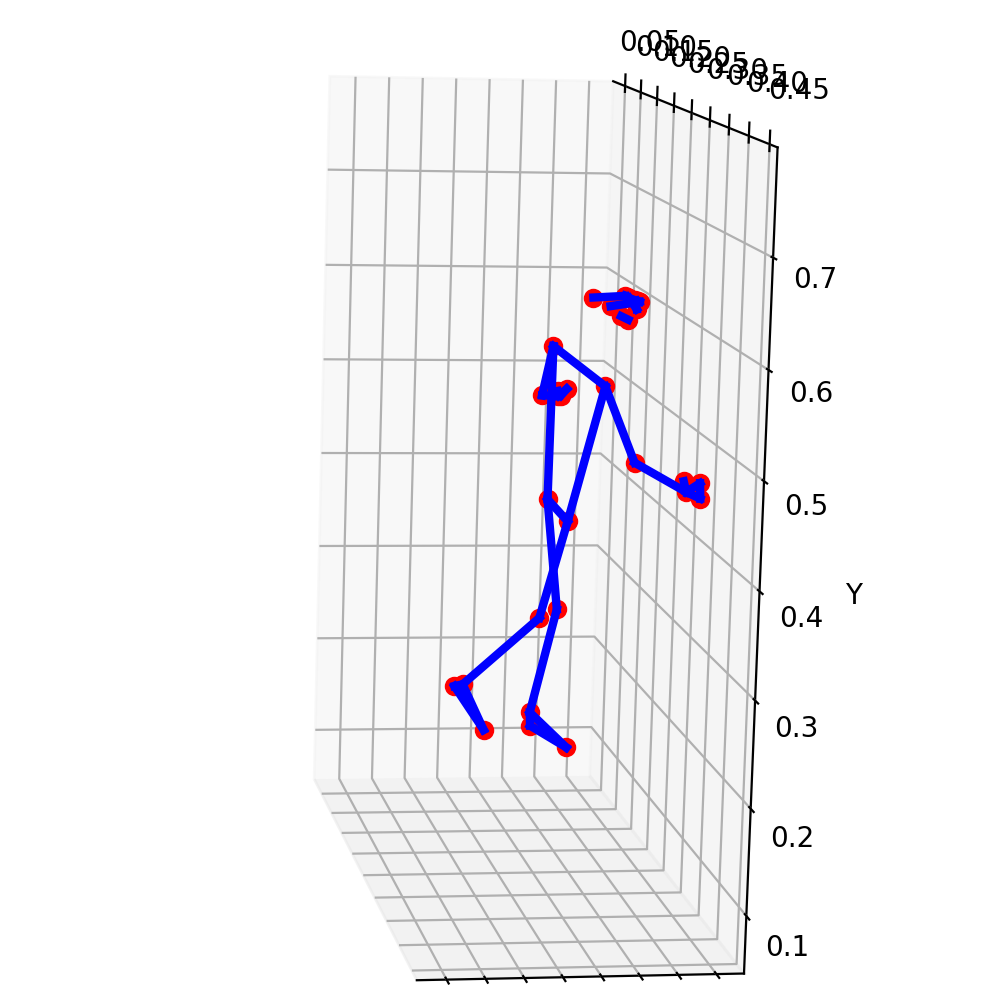

/var/folders/7s/ds2tmwg54q3brtbqdmbxxsxc0000gn/T/ipykernel_30927/3040840259.py:68: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7


In [284]:
%matplotlib notebook

animate(list_of_pose_teacher,world_landmark=False, fps=30)

In [297]:
path = "/Users/jacobrafati/split/split_day_0.jpg"
img = cv2.imread(path, cv2.IMREAD_COLOR)
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose: 
    results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


<IPython.core.display.Javascript object>


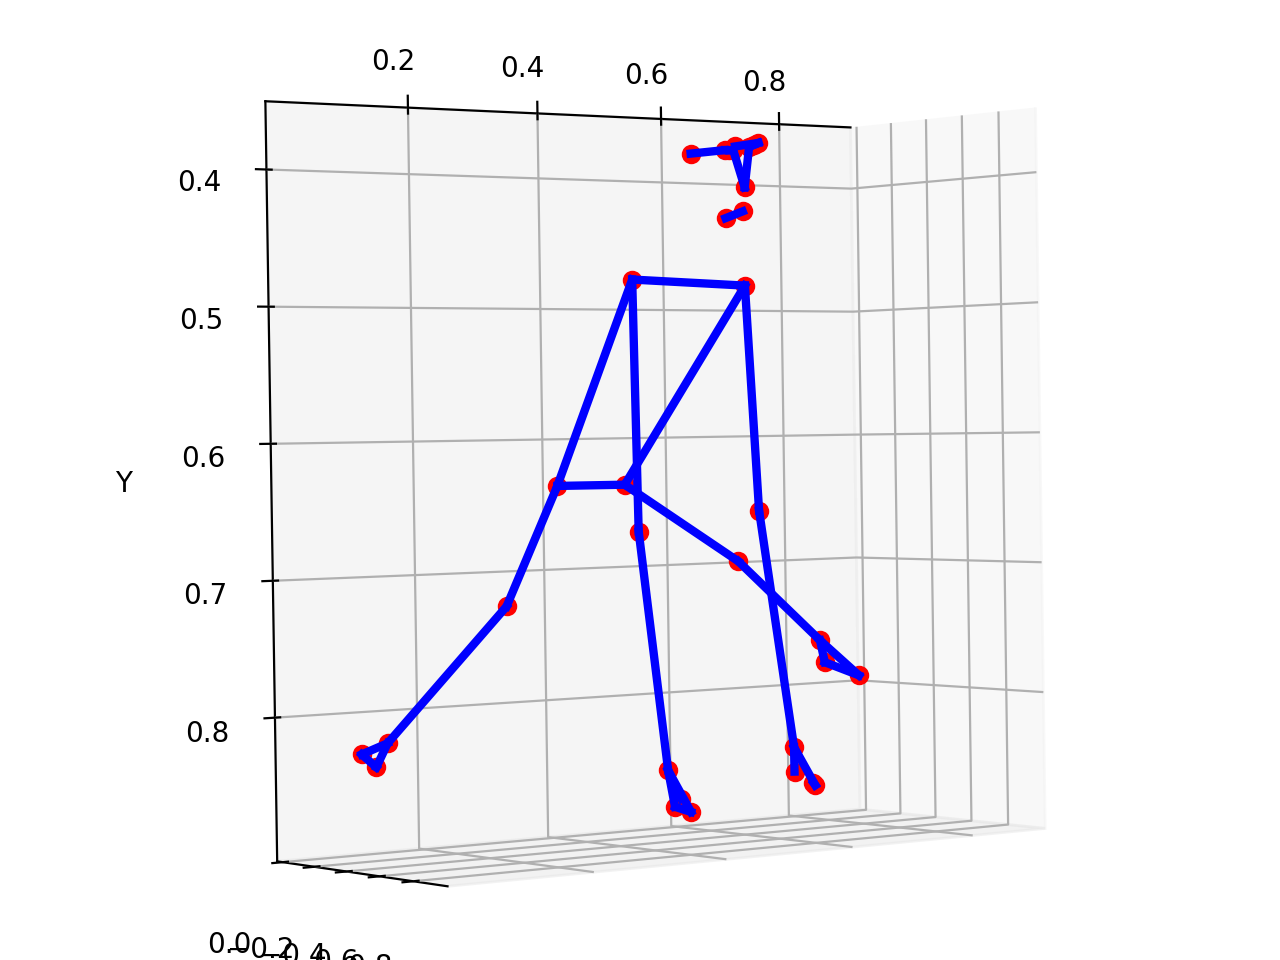

/var/folders/7s/ds2tmwg54q3brtbqdmbxxsxc0000gn/T/ipykernel_30927/1261761066.py:22: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7


In [300]:
%matplotlib notebook
visualize_one_frame_3d([results], 0)

In [310]:
annotated_image = img.copy()
image_hight, image_width, _ = img.shape

thickness = 8
color=(160,32,240)
xs, ys, zs = get_3d_for_frame([results], 0)
for line in skeleton:
    p = line[0]
    q = line[1]     
    start_point = tuple([int(xs[p]*image_width), int(ys[p]*image_hight)])
    end_point = tuple([int(xs[q]*image_width), int(ys[q]*image_hight)])
    annotated_image = cv2.line(annotated_image, start_point, end_point, color, thickness)


<IPython.core.display.Javascript object>


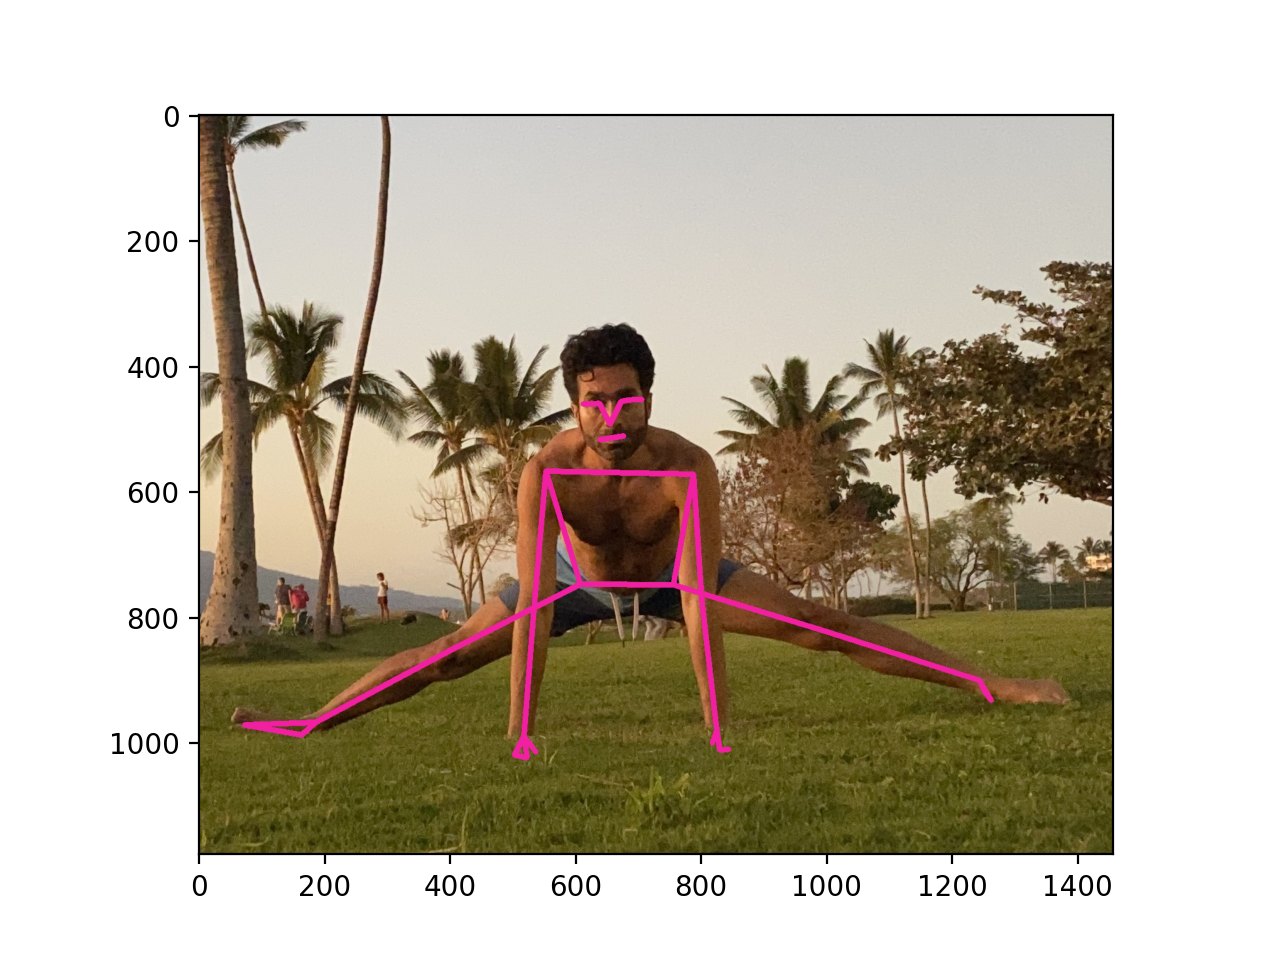

In [309]:
%matplotlib notebook
plt.figure()
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [319]:
right_ankle = np.array([xs[28],ys[28],zs[28]])
left_ankle = np.array([xs[27],ys[27],zs[27]])

right_hip = np.array([xs[24],ys[24],zs[24]])
left_hip = np.array([xs[23],ys[23],zs[23]])

from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm

u = right_ankle - right_hip
v = left_hip - left_ankle
c = dot(u,v)/norm(u)/norm(v) # -> cosine of the angle
angle = arccos(clip(c, -1, 1)) # if you really want the angle
print(angle*180)

169.36992227549467


In [321]:
right_ankle = np.array([xs[28]*image_width,ys[28]*image_hight])
left_ankle = np.array([xs[27]*image_width,ys[27]*image_hight])

right_hip = np.array([xs[24]*image_width,ys[24]*image_hight])
left_hip = np.array([xs[23]*image_width,ys[23]*image_hight])

from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm

u = right_ankle - right_hip
v = left_hip - left_ankle
c = dot(u,v)/norm(u)/norm(v) 
angle = arccos(clip(c, -1, 1))
print(angle*180)

140.9188561290385


In [322]:
path_to_video_student2 = "/Users/jacobrafati/zouk/videos/zouk_basic_steps_Marina.mov"
list_of_frames_student2 = read(path_to_video_student2)
list_of_pose_student2 = extract_pose_from_video(list_of_frames_student2)
annotated_image_list = create_2d_visulaization(list_of_frames_student2, list_of_pose_student2)
image_hight, image_width, _ = list_of_frames_student2[0].shape
write(annotated_image_list,
          "/Users/jacobrafati/zouk/videos/zouk_basic_steps_student2_results.mp4",
          image_width,
          image_hight)


In [ ]:
path_to_video = "/Users/jacobrafati/zouk/videos/zouk_basic_steps_Marina.mov"
list_of_frames = read(path_to_video_student2)
list_of_pose = extract_pose_from_video(list_of_frames_student2)
annotated_image_list = create_2d_visulaization(list_of_frames_student2, list_of_pose_student2)
image_hight, image_width, _ = list_of_frames_student2[0].shape
write(annotated_image_list,
          "/Users/jacobrafati/zouk/videos/zouk_basic_steps_student2_results.mp4",
          image_width,
          image_hight)


In [327]:
path_to_video = "/Users/jacobrafati/videos/ballet/wings_fly.MP4"
list_of_frames = read(path_to_video)
list_of_pose = extract_pose_from_video(list_of_frames)
annotated_image_list = create_2d_visulaization(list_of_frames, list_of_pose)
image_hight, image_width, _ = list_of_frames[0].shape
write(annotated_image_list,
          "/Users/jacobrafati/videos/ballet/wings_fly_results.mp4",
          image_width,
          image_hight)


In [324]:
list_of_frames[0]

array([[[ 27,  44,  45],
        [ 26,  42,  44],
        [ 27,  44,  45],
        ...,
        [ 53,  66,  68],
        [ 52,  65,  67],
        [ 51,  63,  66]],

       [[ 24,  40,  41],
        [ 26,  42,  44],
        [ 28,  45,  46],
        ...,
        [ 53,  66,  68],
        [ 52,  65,  67],
        [ 52,  65,  67]],

       [[ 22,  38,  39],
        [ 26,  42,  44],
        [ 30,  46,  47],
        ...,
        [ 52,  65,  67],
        [ 51,  63,  66],
        [ 51,  63,  66]],

       ...,

       [[193, 207, 222],
        [193, 207, 222],
        [193, 207, 222],
        ...,
        [138, 148, 151],
        [139, 150, 152],
        [139, 150, 152]],

       [[192, 205, 221],
        [192, 205, 221],
        [192, 205, 221],
        ...,
        [138, 148, 151],
        [139, 150, 152],
        [139, 150, 152]],

       [[194, 208, 223],
        [194, 208, 223],
        [194, 208, 223],
        ...,
        [138, 148, 151],
        [139, 150, 152],
        [139, 150, 152]]

<IPython.core.display.Javascript object>


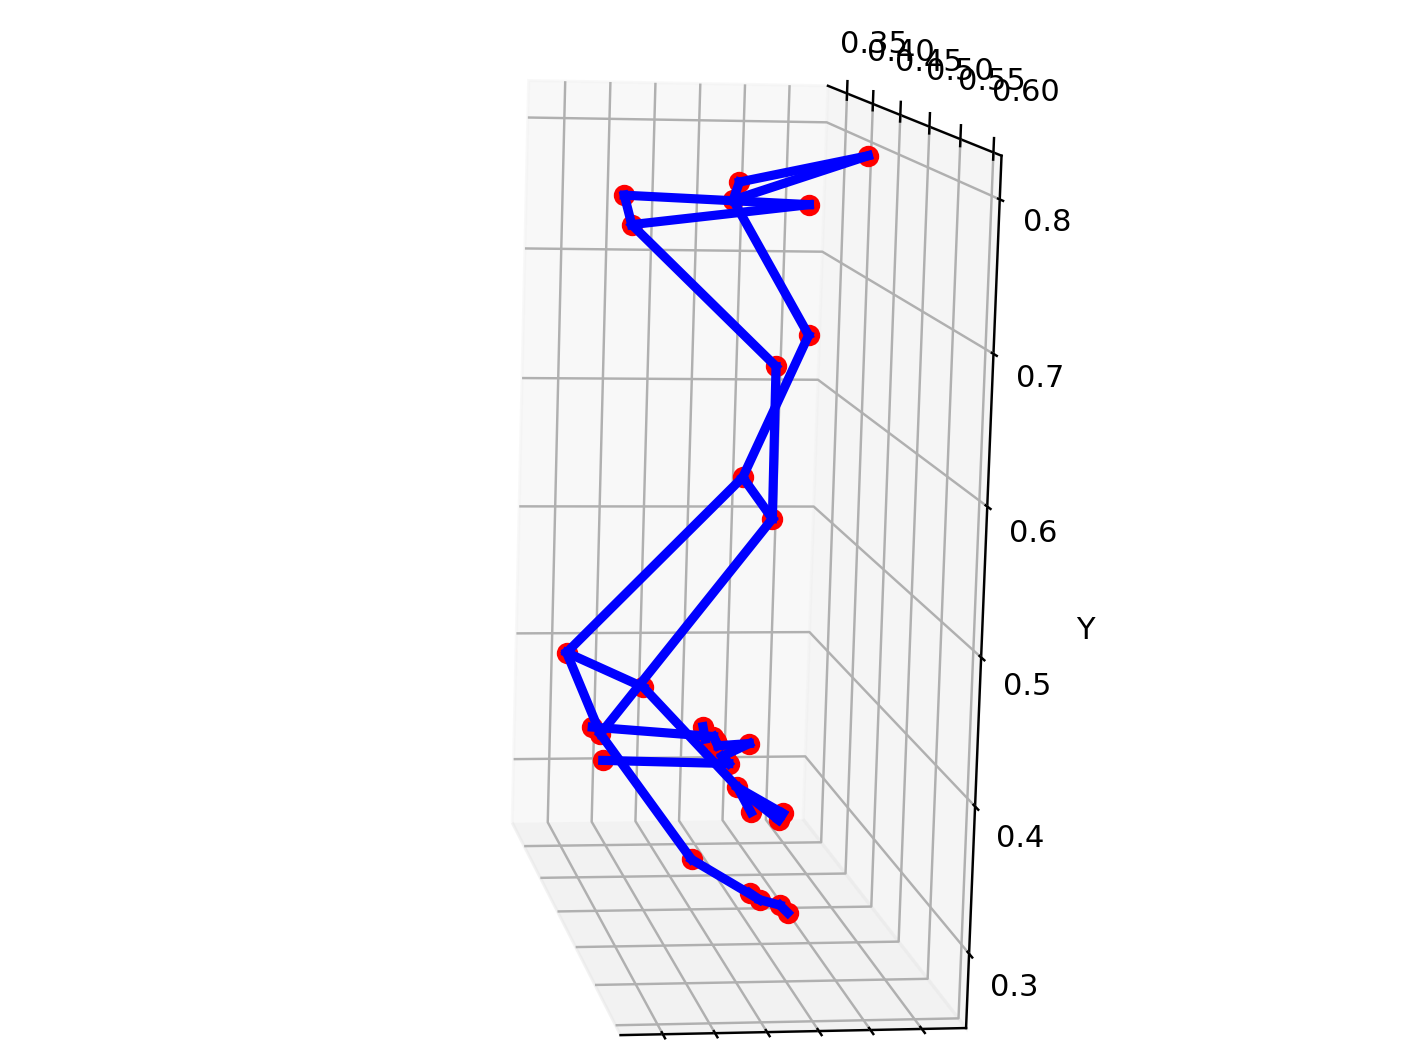

/var/folders/7s/ds2tmwg54q3brtbqdmbxxsxc0000gn/T/ipykernel_30927/1261761066.py:22: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7


In [330]:
%matplotlib notebook
visualize_one_frame_3d(list_of_pose, 0)